In [58]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np

from sklearn.preprocessing import StandardScaler

In [5]:
df_dev = pd.read_csv('dataset/development.csv')
df_eval = pd.read_csv('dataset/evaluation.csv')

df = pd.concat([df_dev, df_eval], sort=False)
df.head()

,id,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,0,http://mashable.com/2014/09/08/safest-cabbies-...,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,...,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,2900.0,bus,tuesday
1,1,http://mashable.com/2013/07/25/3d-printed-rifle/,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,...,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,1300.0,tech,thursday
2,2,http://mashable.com/2013/10/30/digital-dinosau...,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,...,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,17700.0,lifestyle,wednesday
3,3,http://mashable.com/2014/08/27/homer-simpson-i...,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,...,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,1500.0,bus,wednesday
4,4,http://mashable.com/2013/01/10/creepy-robotic-...,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,...,-0.251786,-0.50,-0.100000,0.2,-0.10,0.3,0.10,1400.0,tech,thursday


## Categorical data

### OneHot Encoding
- OneHot Encoding generates redundant data: if the ml model requires too much time to train itself or the model overfits, then the Effect Coding or Dummy Encoding could help to reduce the number of features.

In [6]:
enc = OneHotEncoder()
encoded_df = pd.concat([df_dev['weekday'], df_dev['data_channel']], axis=1)
enc.fit(encoded_df)
encoded_df = enc.transform(encoded_df)
additional_columns = enc.get_feature_names_out()
print(encoded_df.toarray().shape)
working_df_dev = df_dev.copy()
working_df_dev[additional_columns] = encoded_df.toarray()
working_df_dev.drop(['weekday', 'data_channel', 'url', 'id'], axis = 1, inplace=True)
working_df_dev

(31715, 13)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,data_channel_bus,data_channel_entertainment,data_channel_lifestyle,data_channel_socmed,data_channel_tech,data_channel_world
0,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,33.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,NaN,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,4.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,0.0,NaN,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,NaN,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31710,37.0,11.0,440.0,0.564103,1.0,0.718978,10.0,2.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31711,52.0,14.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31712,121.0,9.0,969.0,0.489583,1.0,0.710623,6.0,5.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31713,503.0,11.0,1976.0,0.412308,1.0,0.621080,21.0,3.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Numerical data

### Feature selection based on correlation
- Features to delete (look at multivariate analysis):
    - n_unique_tokens
    - n_non_stop_words
    - kw_max_min
    - kw_min_max
    - kw_max_avg
    - abs_title_sentiment_polarity
    - abs_title_subjectivity
    - rate_positive_words 
    - timedelta
    - max_negative_polarity
    - min_negative_polarity
    - kw_min_min
    - kw_max_max
    - num_self_hrefs
    - n_tokens_content (to be verified)
    - data_channel_business
    - LDA_00

In [11]:
working_df_dev.drop(columns=['n_unique_tokens','n_non_stop_words','kw_max_min','kw_min_max','kw_max_avg','abs_title_sentiment_polarity',
                     'abs_title_subjectivity','rate_positive_words','timedelta','max_negative_polarity','min_negative_polarity',
                     'kw_min_min','kw_max_max','num_self_hrefs','data_channel_bus','LDA_00'], inplace=True)

In [12]:
working_df_dev.head()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_avg_min,kw_avg_max,...,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,data_channel_entertainment,data_channel_lifestyle,data_channel_socmed,data_channel_tech,data_channel_world
0,12.0,1015.0,0.545031,10.0,33.0,1.0,4.656158,4.0,110.500000,398350.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.0,503.0,0.737542,9.0,NaN,1.0,4.576541,10.0,524.750000,117960.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.0,232.0,0.748428,12.0,4.0,1.0,4.935345,6.0,198.666667,573878.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,12.0,171.0,0.867925,9.0,0.0,NaN,4.970760,6.0,444.166667,311033.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,11.0,286.0,0.800000,5.0,NaN,0.0,5.006993,NaN,356.200000,6830.125000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Feature selection based on univariate analysis
- Features to delete:
    - n_tokens_content: It can be observed that there are a lot of values equal to 0 words: this can be due to an error during the data collection step. As solution, we decide to drop the records corresponding to the value zero of this feature (3% of the whole dataset)
- Features to transform:
    - num_imgs: Filled NaN values with 0 and rescaled in logarithmic scale to better distribute data and remove outliers.
    - num_videos: Filled NaN values with 0 and rescaled in logarithmic scale to better distribute data and remove outliers.
    - n_tokens_content: Rescaled in logarithmic scale to better distribute data and remove outliers
- Features to scale:
    - n_tokens_content: standardScaler
    - n_tokens_title: standardScaler
    


In [40]:
working_df_dev = working_df_dev.query("n_tokens_content > 0")
working_df_dev

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_avg_min,kw_avg_max,...,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,data_channel_entertainment,data_channel_lifestyle,data_channel_socmed,data_channel_tech,data_channel_world
0,12.0,1015.0,0.545031,10.0,33.0,1.0,4.656158,4.0,110.500000,398350.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.0,503.0,0.737542,9.0,NaN,1.0,4.576541,10.0,524.750000,117960.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.0,232.0,0.748428,12.0,4.0,1.0,4.935345,6.0,198.666667,573878.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,12.0,171.0,0.867925,9.0,0.0,NaN,4.970760,6.0,444.166667,311033.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,11.0,286.0,0.800000,5.0,NaN,0.0,5.006993,NaN,356.200000,6830.125000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31709,11.0,518.0,0.703008,9.0,1.0,1.0,4.372587,NaN,340.333333,221400.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31710,11.0,440.0,0.718978,10.0,NaN,NaN,4.784091,5.0,222.800000,256540.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
31712,9.0,969.0,0.710623,6.0,2.0,1.0,4.594427,8.0,196.666667,210875.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
31713,11.0,1976.0,0.621080,21.0,1.0,3.0,4.353239,10.0,174.400000,275820.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [54]:
working_df_dev['n_tokens_content'] = np.log(working_df_dev['n_tokens_content'])

In [41]:
working_df_dev['num_imgs'].fillna(0, inplace=True)

<Axes: >

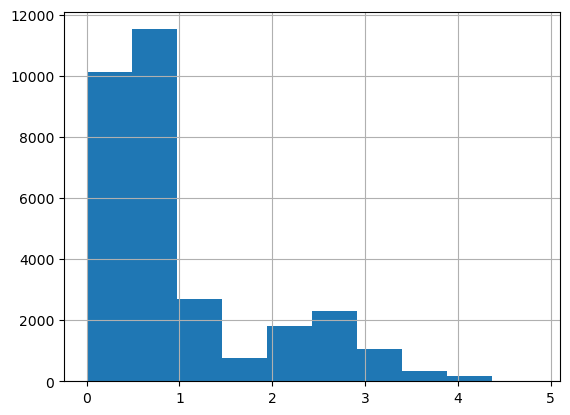

In [46]:
np.log(1+working_df_dev['num_imgs']).hist()

In [47]:
working_df_dev['num_imgs'] = np.log(1+working_df_dev['num_imgs'])

<Axes: >

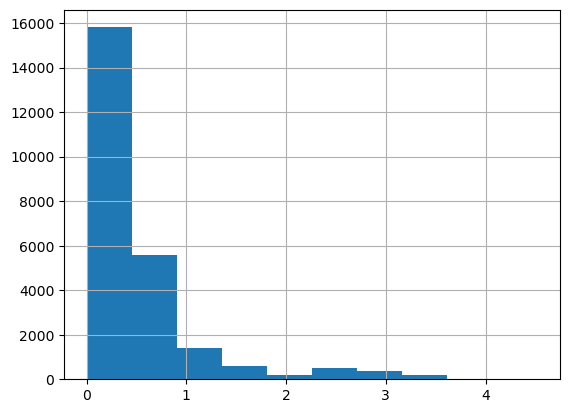

In [48]:
working_df_dev['num_imgs'].fillna(0, inplace=True)
np.log(1+working_df_dev['num_videos']).hist()

In [49]:
working_df_dev['num_videos'] = np.log(1+working_df_dev['num_videos'])

<Axes: >

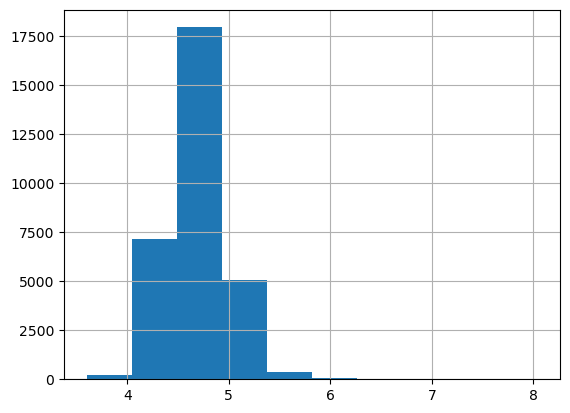

In [51]:
working_df_dev['average_token_length'].hist()

<Axes: >

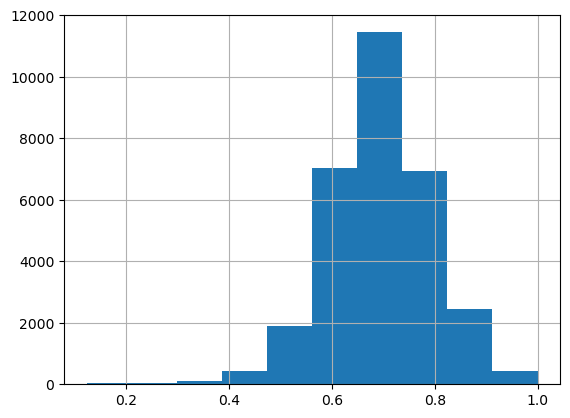

In [55]:
working_df_dev['n_non_stop_unique_tokens'].hist()

In [60]:
std_scaler = StandardScaler().fit(working_df_dev[['n_tokens_title', 'n_tokens_content']])
scaled_features = std_scaler.transform(working_df_dev[['n_tokens_title', 'n_tokens_content']])

working_df_dev[['n_tokens_title', 'n_tokens_content']] = scaled_features
working_df_dev[['n_tokens_title', 'n_tokens_content']]

,n_tokens_title,n_tokens_content
0,0.768992,1.182360
1,-0.649891,0.213789
2,-0.649891,-0.853837
3,0.768992,-1.274725
4,0.296031,-0.565145
...,...,...
31709,0.296031,0.254330
31710,0.296031,0.029174
31712,-0.649891,1.118374
31713,0.296031,2.101447
